# Network synchronization in BRIAN

*I barely understand `brian` syntax, our goal here is just to use it to easily simulate some simple neurons.*
If you run into the situation where a bunch of errors start popping up, try restarting the kernel.

This example is the same as the single neuron you simulated earlier, except now we will simulate a network of 5000 of these same neurons!

## Exercise

First, run the simulation with the default params and see what it does.

Then there are 2 more parameters I want you to play with:
```
sparseness = 0.1  # network probability of connections
J = .1*mV         # synaptic "strength": one spike leads to this change in voltage
```

See if you can change the *qualitative* behavior (**synchrony** versus **asynchrony**) or *quantitative* behavior (period of oscillation) using these and the other params `muext` and `sigmaext` that we played with before.

Are there network effects happening here? Anything that is _not_ intuitive?

In [3]:
from brian2 import *
%matplotlib inline

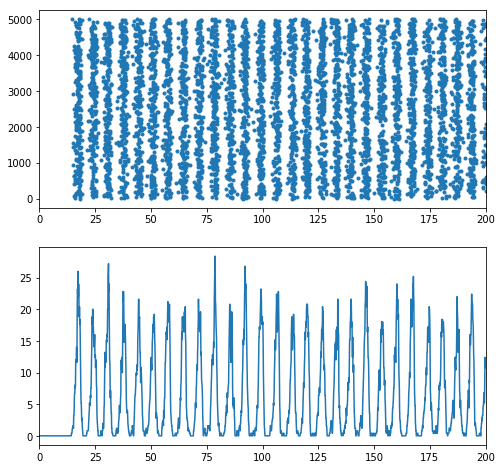

In [5]:
'''
This code comes from:

https://brian2.readthedocs.io/en/stable/examples/frompapers.Rossant_et_al_2011bis.html
 
first published as

 Rossant C, Leijon S, Magnusson AK, Brette R (2011). “Sensitivity of noisy neurons to coincident inputs”. 
 Journal of Neuroscience, 31(47).
'''

N = 5000
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .2*second

# Parameters we will play with
sparseness = 0.1  # network probability of connections
J = .1*mV         # synaptic "strength" one spike leads to this change in voltage
muext = 25*mV     # tonic drive current
sigmaext = 1*mV   # strength of external noise

# Equations of motion
# note: xi is white noise
eqs = """
dV/dt = (-V + muext + sigmaext * sqrt(tau) * xi)/tau : volt
"""

group = NeuronGroup(N, eqs, threshold='V>theta',
                    reset='V=Vr', refractory=taurefr, method='euler')
group.V = Vr
conn = Synapses(group, group, on_pre='V += -J', delay=delta) # on_pre means, "when a presynaptic neuron spikes"
conn.connect(p=sparseness)
M = SpikeMonitor(group)
LFP = PopulationRateMonitor(group)

run(duration)

figure(figsize=(8,8))
subplot(211)
plot(M.t/ms, M.i, '.')
xlim(0, duration/ms)

subplot(212)
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
xlim(0, duration/ms)
#xlim([0,500])
show()
